Random forest

In [1]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("emotion_data.csv")

In [3]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [4]:
df["text"] = df["text"].apply(preprocess_text)

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

In [7]:
np.unique(y_train)

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [55]:
# Create a TF-IDF + Random Forest pipeline
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [15]:
# Predictions
y_pred = pipeline.predict(X_test)

NameError: name 'pipeline' is not defined

In [57]:
# Model evaluation
print("Emotion Classification Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Emotion Classification Accuracy: 0.863
              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       536
        fear       0.81      0.79      0.80       458
         joy       0.83      0.94      0.89      1339
        love       0.83      0.70      0.76       335
     sadness       0.92      0.89      0.90      1173
    surprise       0.83      0.69      0.75       159

    accuracy                           0.86      4000
   macro avg       0.85      0.80      0.83      4000
weighted avg       0.86      0.86      0.86      4000



In [14]:
# Test with a sample text
sample_text = ["Radiation Leak Detected Near Major City: Authorities Warn of Health Risks!"]
print("Predicted Emotion:", pipeline.predict(sample_text)[0])

NameError: name 'pipeline' is not defined

SVM

In [12]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [13]:
# Create a TF-IDF + SVM pipeline
pipeline_svm = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', probability=True))

In [14]:
# Train the model
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(kernel='linear', probability=True))])

In [15]:
# Predictions
y_pred_svm = pipeline_svm.predict(X_test)

In [16]:
# Model evaluation
print("Emotion Classification Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Emotion Classification Accuracy (SVM): 0.8845
              precision    recall  f1-score   support

       anger       0.89      0.86      0.88       536
        fear       0.81      0.84      0.82       458
         joy       0.89      0.94      0.91      1339
        love       0.84      0.75      0.79       335
     sadness       0.92      0.92      0.92      1173
    surprise       0.87      0.65      0.74       159

    accuracy                           0.88      4000
   macro avg       0.87      0.83      0.84      4000
weighted avg       0.88      0.88      0.88      4000



In [17]:
# Test with a sample text
sample_text = ["This news is terrifying and makes me anxious!"]
print("Predicted Emotion (SVM):", pipeline_svm.predict(sample_text)[0])

Predicted Emotion (SVM): fear


XGboost

In [6]:
import xgboost as xgb
from sklearn.pipeline import make_pipeline

In [7]:
# Create a TF-IDF + XGBoost pipeline
pipeline_xgb = make_pipeline(TfidfVectorizer(), xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verify mapping
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Mapping: {'anger': np.int64(0), 'fear': np.int64(1), 'joy': np.int64(2), 'love': np.int64(3), 'sadness': np.int64(4), 'surprise': np.int64(5)}


In [9]:
# Train the model
pipeline_xgb.fit(X_train, y_train_encoded)

d:\python\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [10]:
# Predictions
y_pred_xgb = pipeline_xgb.predict(X_test)

In [11]:
# Convert predictions back to original labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

In [16]:
# Test with a sample text
sample_text = ["This news is terrifying and makes me anxious!"]
print("Predicted Emotion (SVM):", pipeline_xgb.predict(sample_text)[0])

Predicted Emotion (SVM): 1


In [12]:
# Model evaluation
print("Emotion Classification Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb_labels))
print(classification_report(y_test, y_pred_xgb_labels))

Emotion Classification Accuracy (XGBoost): 0.88325
              precision    recall  f1-score   support

       anger       0.90      0.86      0.88       536
        fear       0.85      0.84      0.85       458
         joy       0.87      0.92      0.90      1339
        love       0.77      0.82      0.80       335
     sadness       0.95      0.90      0.92      1173
    surprise       0.80      0.77      0.78       159

    accuracy                           0.88      4000
   macro avg       0.86      0.85      0.85      4000
weighted avg       0.89      0.88      0.88      4000



C:\Users\Sunilraj\AppData\Local\Temp\ipykernel_508\3112826224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="viridis")


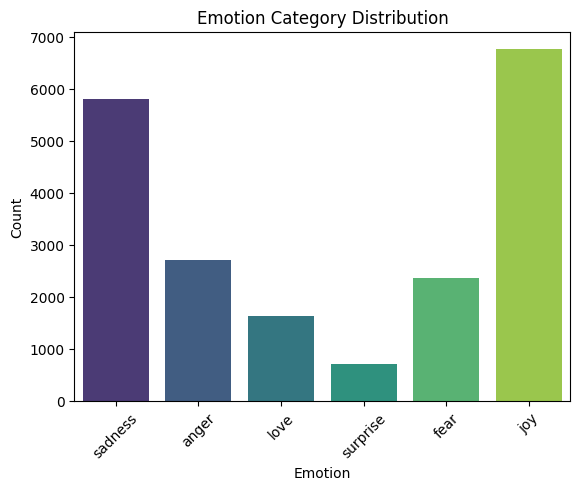

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["label"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Emotion Category Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


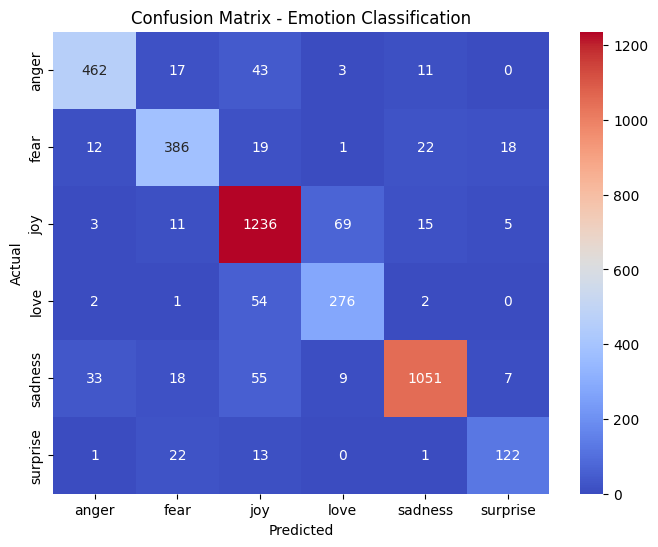

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred_xgb_labels, labels=label_encoder.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Emotion Classification")
plt.show()


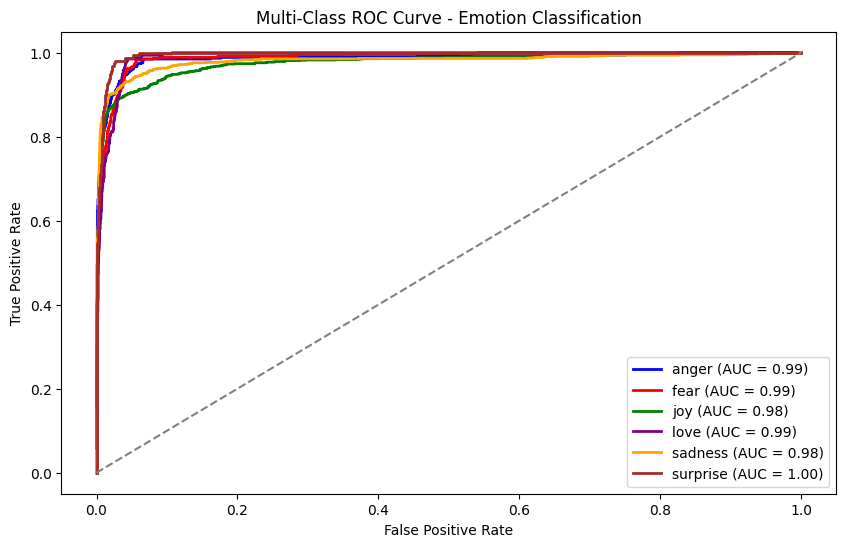

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Binarize labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=label_encoder.classes_)
n_classes = y_test_binarized.shape[1]

# Get prediction probabilities
y_score = pipeline_xgb.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve - Emotion Classification")
plt.legend(loc="lower right")
plt.show()

In [13]:
import joblib
joblib.dump(pipeline_xgb, "emotion_model.pkl")

['emotion_model.pkl']

In [68]:
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

Ensemble Model : SVM + XGBoost + Logistic Regression

In [42]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [43]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [44]:
# Define base models
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel="linear", probability=True, C=1))
xgb_model = make_pipeline(TfidfVectorizer(), xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
logreg_model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=500, solver="liblinear"))

In [45]:
# Create stacking ensemble
stacking_model = StackingClassifier(
    estimators=[("svm", svm_model), ("xgb", xgb_model), ("logreg", logreg_model)],
    final_estimator=LogisticRegression()  # Meta-classifier
)

In [46]:
# Train stacking model
stacking_model.fit(X_train, y_train_encoded)

d:\python\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\python\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\python\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\python\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\python\Lib\site-packages\xgbo

StackingClassifier(estimators=[('svm',
                                Pipeline(steps=[('tfidfvectorizer',
                                                 TfidfVectorizer()),
                                                ('svc',
                                                 SVC(C=1, kernel='linear',
                                                     probability=True))])),
                               ('xgb',
                                Pipeline(steps=[('tfidfvectorizer',
                                                 TfidfVectorizer()),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               de...
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None, ...))])),
                               ('logreg',
                                Pipeline(steps=[('tfidfvectorizer',
                                                 TfidfVectorizer()),
                                                ('logisticregression',
                                                 LogisticRegression(max_iter=500,
                                                                    solver='liblinear'))]))],
                   final_estimator=LogisticRegression())

In [47]:
# Predictions
y_pred_stacking = stacking_model.predict(X_test)

In [48]:
# Convert predictions back to original labels
y_pred_stacking_labels = label_encoder.inverse_transform(y_pred_stacking)

In [49]:
# Model evaluation
print("Emotion Classification Accuracy (Stacking):", accuracy_score(y_test, y_pred_stacking_labels))
print(classification_report(y_test, y_pred_stacking_labels))

Emotion Classification Accuracy (Stacking): 0.89475
              precision    recall  f1-score   support

       anger       0.91      0.87      0.89       536
        fear       0.83      0.86      0.85       458
         joy       0.91      0.93      0.92      1339
        love       0.81      0.80      0.81       335
     sadness       0.93      0.93      0.93      1173
    surprise       0.85      0.72      0.78       159

    accuracy                           0.89      4000
   macro avg       0.87      0.85      0.86      4000
weighted avg       0.89      0.89      0.89      4000

